In [ ]:
import os
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive (if needed)
drive.mount('/content/drive')

# Define input and output directories



Mounted at /content/drive


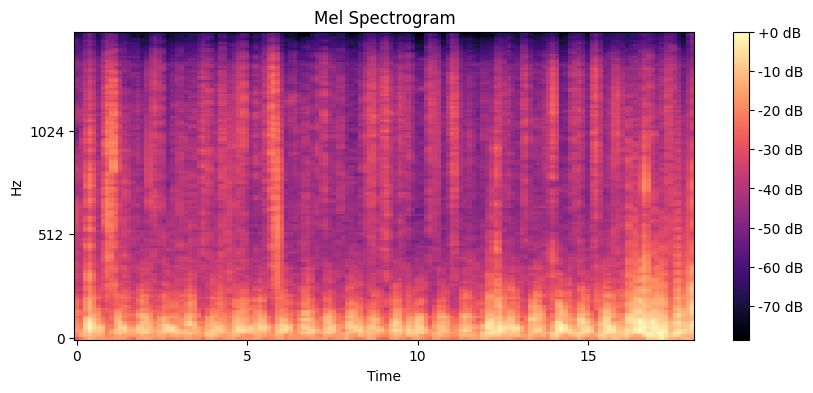

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def extract_mel_spectrogram(y, sr, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibel scale
    return mel_spec_db

# Example usage
y, sr = librosa.load("/content/drive/MyDrive/Circor_Dataset_2/Files/9979_AV.wav", sr=4000)
mel_spec = extract_mel_spectrogram(y, sr)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()


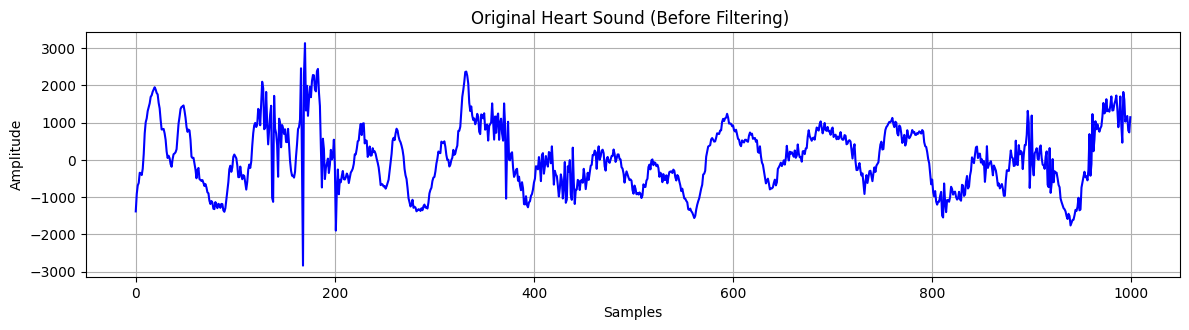

In [ ]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load the heart sound file
sample_file = "/content/drive/MyDrive/Circor_Dataset_2/Files/9979_AV.wav"
fs, data = wav.read(sample_file)

# Convert to mono if stereo
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Select a short segment (e.g., first 2000 samples)
start_sample = 28000  # Adjust this to zoom in on a specific part
end_sample = start_sample +1000  # Display 2000 samples

# Plot the waveforms
plt.figure(figsize=(12, 6))

# Original Signal (Zoomed in)
plt.subplot(2, 1, 1)
plt.plot(data[start_sample:end_sample], color='b')
plt.title("Original Heart Sound (Before Filtering) ")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav

# Define input and output directories
input_folder = "/content/drive/MyDrive/Circor_Dataset_2/Files"  # Your input folder
output_folder = "/content/drive/MyDrive/Normalized2/PCG_filtered"  # Your output folder

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Function to apply a 4th-order Butterworth bandpass filter (25-400 Hz)
def butter_bandpass_filter(data, fs, lowcut=25, highcut=400, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Process all WAV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".wav"):
        filepath = os.path.join(input_folder, filename)
        fs, data = wav.read(filepath)

        # If stereo, convert to mono by averaging the channels
        if len(data.shape) > 1:
            data = data.mean(axis=1)

        # Apply bandpass filtering (25-400 Hz)
        filtered_data = butter_bandpass_filter(data, fs, lowcut=25, highcut=400)

        # Normalize the filtered signal
        normalized_data = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

        # Skip if filtered_data is empty
        if len(filtered_data) == 0:
            print(f"Skipping {filename} because filtered audio is empty!")
            continue

        # Save the filtered and normalized file
        output_path = os.path.join(output_folder, filename)
        wav.write(output_path, fs, (normalized_data * 32767).astype(np.int16))  # Save as 16-bit int16

        # Check if the file is saved successfully
        if os.path.exists(output_path):
            print(f"Successfully saved: {output_path}")
        else:
            print(f"Failed to save: {output_path}")

print(" Filtering and normalization completed for all WAV files!")


Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84751_TV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84751_MV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84751_PV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84785_TV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84785_AV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84785_MV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84785_PV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84834_TV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84834_PV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84834_MV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84834_AV.wav
Successfully saved: /content/drive/MyDrive/Normalized2/PCG_filtered/84851_PV.wav
Successfully saved: /content

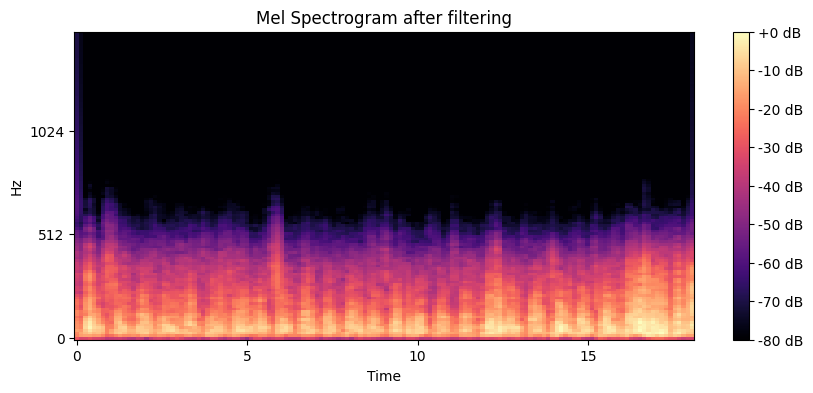

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def extract_mel_spectrogram(y, sr, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibel scale
    return mel_spec_db

# Example usage
y, sr = librosa.load("/content/drive/MyDrive/Dummy/9979_AV.wav", sr=4000)
mel_spec = extract_mel_spectrogram(y, sr)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram after filtering")
plt.show()


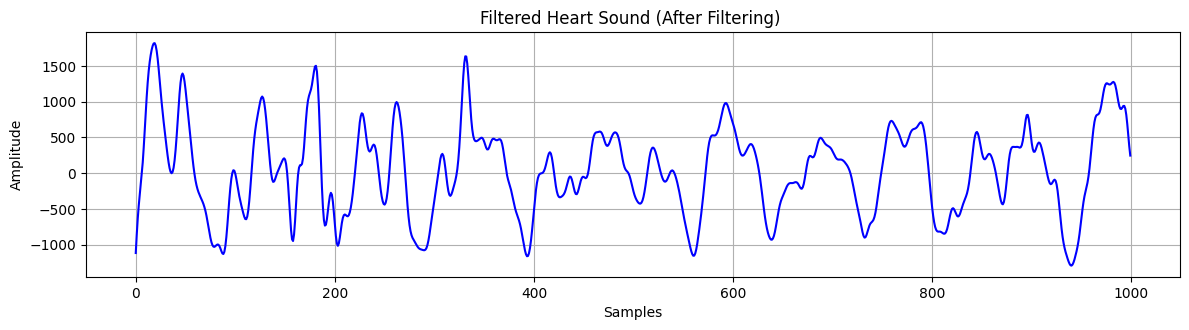

In [ ]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

sample_file = "/content/drive/MyDrive/Dummy/9979_AV.wav"

# Load the original heart sound file
fs, data = wav.read(sample_file)

# Convert to mono if stereo
if len(data.shape) > 1:
    data = data.mean(axis=1)



start_sample = 28000 # Adjust this to zoom in on a specific part
end_sample = start_sample + 1000  # Display 2000 samples

# Plot the waveforms
plt.figure(figsize=(12, 6))

# Original Signal (Zoomed in)
plt.subplot(2, 1, 1)
plt.plot(data[start_sample:end_sample], color='b')
plt.title("Filtered Heart Sound (After Filtering) ")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd

# Paths
filtered_wav_dir = "/content/drive/MyDrive/Normalized2/PCG_filtered"  # Filtered WAV files
features_dir = "/content/drive/MyDrive/Normalized2/Extracted_Features"  # Output folder for features

# Ensure output directory exists
os.makedirs(features_dir, exist_ok=True)

# Parameters
N_MFCC = 13
WINDOW_SIZE = 1.0  # 1-second window
OVERLAP = 0.5  # 50% overlap
FS_TARGET = 4000  # 4000 Hz sampling rate

# Get list of patient IDs by finding unique prefixes
wav_files = glob.glob(os.path.join(filtered_wav_dir, "*.wav"))
patient_ids = sorted(set(os.path.basename(f).split('_')[0] for f in wav_files))

print(f"Found {len(wav_files)} WAV files for {len(patient_ids)} patients.")

def extract_mfcc(segment, sr):
    """Extract 13 MFCC features from a given segment."""
    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)  # Mean across time axis

# Process each patient
for patient_id in patient_ids:
    print(f"\nProcessing Patient: {patient_id}")

    # Dictionary to store MFCCs
    patient_mfcc = {valve: [] for valve in ['AV', 'PV', 'MV', 'TV']}
    max_windows = 0

    for valve in ['AV', 'PV', 'MV', 'TV']:
        wav_path = os.path.join(filtered_wav_dir, f"{patient_id}_{valve}.wav")

        if not os.path.exists(wav_path):
            print(f"Missing WAV file: {wav_path}")
            continue

        # Load WAV file
        y, sr = librosa.load(wav_path, sr=FS_TARGET)

        # Define segmentation step
        step_size = int((WINDOW_SIZE - OVERLAP) * sr)
        window_length = int(WINDOW_SIZE * sr)

        for start in range(0, len(y) - window_length + 1, step_size):
            segment = y[start:start + window_length]
            if len(segment) == window_length:
                mfcc_features = extract_mfcc(segment, sr)
                patient_mfcc[valve].append(mfcc_features.tolist())

        max_windows = max(max_windows, len(patient_mfcc[valve]))

    # If no valid windows found, skip patient
    if max_windows == 0:
        print(f"No valid MFCC segments found for patient {patient_id}")
        continue

    # Pad shorter lists with NaN
    for valve in ['AV', 'PV', 'MV', 'TV']:
        while len(patient_mfcc[valve]) < max_windows:
            patient_mfcc[valve].append([np.nan] * N_MFCC)

    # Create DataFrame
    df_mfcc = pd.DataFrame()
    df_mfcc[f'Window ({patient_id})'] = list(range(1, max_windows + 1))

    for idx, valve in enumerate(['AV', 'PV', 'MV', 'TV']):
        for i in range(1, 14):
            df_mfcc[f'MFCC_{(idx * 13) + i} ({valve})'] = [row[i - 1] for row in patient_mfcc[valve]]

    # Save CSV
    output_file = os.path.join(features_dir, f"{patient_id}_MFCC.csv")
    df_mfcc.to_csv(output_file, index=False)

    print(f"Processed: {output_file}")

print("\nAll MFCC features extracted and stored for all patients.")


Found 656 WAV files for 164 patients.

Processing Patient: 13918
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/13918_MFCC.csv

Processing Patient: 14241
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/14241_MFCC.csv

Processing Patient: 29045
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/29045_MFCC.csv

Processing Patient: 33151
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/33151_MFCC.csv

Processing Patient: 39043
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/39043_MFCC.csv

Processing Patient: 40840
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/40840_MFCC.csv

Processing Patient: 43852
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/43852_MFCC.csv

Processing Patient: 44514
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/44514_MFCC.csv

Processing Patient: 46065
Processed: /content/drive/MyDrive/Normalized2/Extracted_Features/46065_MFCC.csv

In [ ]:
features_dir = "/content/drive/My Drive/Normalized2/Extracted_Features"
modified_dir = "/content/drive/My Drive/Normalized2/modified_features"

# Ensure the output directory exists
os.makedirs(modified_dir, exist_ok=True)

#  Step 3: Process all CSV files
for filename in os.listdir(features_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(features_dir, filename)

        # Load CSV
        df = pd.read_csv(file_path)

        # Fill missing values with 0
        df_filled = df.fillna(0)

        # Save the modified file
        output_path = os.path.join(modified_dir, filename)
        df_filled.to_csv(output_path, index=False)

        print(f"Processed & saved: {filename}")

print("All CSV files processed and saved in 'modified_features'!")

Processed & saved: 13918_MFCC.csv
Processed & saved: 14241_MFCC.csv
Processed & saved: 29045_MFCC.csv
Processed & saved: 33151_MFCC.csv
Processed & saved: 39043_MFCC.csv
Processed & saved: 40840_MFCC.csv
Processed & saved: 43852_MFCC.csv
Processed & saved: 44514_MFCC.csv
Processed & saved: 46065_MFCC.csv
Processed & saved: 49610_MFCC.csv
Processed & saved: 49627_MFCC.csv
Processed & saved: 49628_MFCC.csv
Processed & saved: 49691_MFCC.csv
Processed & saved: 49719_MFCC.csv
Processed & saved: 49853_MFCC.csv
Processed & saved: 49980_MFCC.csv
Processed & saved: 49988_MFCC.csv
Processed & saved: 49990_MFCC.csv
Processed & saved: 49994_MFCC.csv
Processed & saved: 49995_MFCC.csv
Processed & saved: 49999_MFCC.csv
Processed & saved: 50007_MFCC.csv
Processed & saved: 50017_MFCC.csv
Processed & saved: 50029_MFCC.csv
Processed & saved: 50103_MFCC.csv
Processed & saved: 50229_MFCC.csv
Processed & saved: 50238_MFCC.csv
Processed & saved: 50244_MFCC.csv
Processed & saved: 50256_MFCC.csv
Processed & sa

In [ ]:


# Paths
filtered_csv_path = "/content/drive/My Drive/Circor_Dataset_2/Files/filtered.csv"  # Ensure correct path
mfcc_folder_path = "/content/drive/My Drive/Normalized2/modified_features"  # Ensure correct path
output_folder = "/content/drive/My Drive/Normalized2/Labeled_Features"  # Output folder

# Ensure output folder exists
try:
    os.makedirs(output_folder, exist_ok=True)
    print(f"Folder created or already exists: {output_folder}")
except Exception as e:
    print(f"Error creating folder: {e}")

# Load filtered.csv containing Patient ID and Murmur labels
filtered_df = pd.read_csv(filtered_csv_path)

# Convert 'Murmur' column to numerical values (1 for present, 0 for absent)
filtered_df['Murmur'] = filtered_df['Murmur'].map({'Present': 1, 'Absent': 0})

# Extract relevant columns
filtered_df = filtered_df[['Patient ID', 'Murmur']]
filtered_df.set_index('Patient ID', inplace=True)

# Process each MFCC feature file
for file_name in os.listdir(mfcc_folder_path):
    if file_name.endswith(".csv"):
        patient_id = file_name.split("_")[0]  # Extract patient ID from filename
        patient_file_path = os.path.join(mfcc_folder_path, file_name)

        # Load MFCC feature file
        mfcc_df = pd.read_csv(patient_file_path)

        # Get murmur label for the patient
        try:
            murmur_label = filtered_df.loc[int(patient_id), 'Murmur']
        except KeyError:
            print(f"Warning: Patient ID {patient_id} not found in filtered.csv")
            continue

        # Add murmur label column
        mfcc_df['Murmur'] = murmur_label

        # Save labeled file
        output_file_path = os.path.join(output_folder, file_name)
        mfcc_df.to_csv(output_file_path, index=False)
        print(f"Processed {file_name} -> Saved to {output_file_path}")

print("Processing completed!")


Folder created or already exists: /content/drive/My Drive/Normalized2/Labeled_Features
Processed 13918_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/13918_MFCC.csv
Processed 14241_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/14241_MFCC.csv
Processed 29045_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/29045_MFCC.csv
Processed 33151_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/33151_MFCC.csv
Processed 39043_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/39043_MFCC.csv
Processed 40840_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/40840_MFCC.csv
Processed 43852_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/43852_MFCC.csv
Processed 44514_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/Labeled_Features/44514_MFCC.csv
Processed 46065_MFCC.csv -> Saved to /content/drive/My Drive/Normalized2/

In [ ]:
import numpy as np
import os
import pandas as pd

# Define input and output paths
data_path = "/content/drive/My Drive/Normalized2/Labeled_Features"  # Update if needed
output_path = "/content/drive/My Drive/Normalized2/Processed_Features"  # Output folder for even-length files

# Ensure output folder exists
os.makedirs(output_path, exist_ok=True)

# Step 1: Find max number of rows in all CSV files
max_rows = 0
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(data_path, file))
        max_rows = max(max_rows, len(df))  # Track the largest row count

print(f"Maximum number of rows found: {max_rows}")

# Step 2: Process each file using max_rows as fixed length
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(data_path, file))

        # Extract "Window" column separately
        window_col = df.iloc[:, 0].values  # First column is Window (time step index)
        features = df.iloc[:, 1:-1].values  # Exclude window and label columns
        label = df.iloc[:, -1].values[0]  # Get murmur label (0 or 1)

        # Adjust sequence length based on max_rows
        if features.shape[0] < max_rows:
            # Create padding for Window column
            padded_window_col = np.arange(window_col[-1] + 1, window_col[-1] + 1 + (max_rows - features.shape[0]))
            window_col = np.concatenate((window_col, padded_window_col))

            # Create zero padding for features
            padding = np.zeros((max_rows - features.shape[0], features.shape[1]))
            features = np.vstack((features, padding))  # Append padding
        else:
            # Truncate excess rows
            window_col = window_col[:max_rows]
            features = features[:max_rows]

        # Convert back to DataFrame with "Window" column
        processed_df = pd.DataFrame(features, columns=df.columns[1:-1])  # Keep MFCC columns
        processed_df.insert(0, "Window", window_col)  # Reinsert Window column
        processed_df["Murmur"] = label  # Add label column

        # Save processed file
        processed_df.to_csv(os.path.join(output_path, file), index=False)

print(f"All MFCC files are now of equal length ({max_rows} windows per patient) with 'Window' column retained!")


Maximum number of rows found: 92
All MFCC files are now of equal length (92 windows per patient) with 'Window' column retained!


In [ ]:
import os
import pandas as pd

# Define directory containing the files
data_path = "/content/drive/My Drive/Normalized2/Processed_Features"

# Process each CSV file
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        file_path = os.path.join(data_path, file)

        # Load CSV
        df = pd.read_csv(file_path)

        # Remove only the "Window" column (first column)
        df = df.iloc[:, 1:]

        # Save the modified file (overwrite)
        df.to_csv(file_path, index=False)

print("'Window' column removed from all files successfully!")


'Window' column removed from all files successfully!


In [ ]:
import os
import pandas as pd

# Define input and output directories
data_path = "/content/drive/My Drive/Normalized2/Processed_Features"
final_path = "/content/drive/My Drive/Normalized2/Final"

# Create the "Final" directory if it doesn't exist
os.makedirs(final_path, exist_ok=True)

# Process each CSV file
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        file_path = os.path.join(data_path, file)

        # Load CSV
        df = pd.read_csv(file_path)

        # Extract the first value from "Murmur" column
        murmur_value = df.iloc[0, -1]  # Last column should be "Murmur"

        # Ensure Murmur label is only 0 or 1
        if murmur_value not in [0, 1]:
            print(f"Skipping {file} - Invalid Murmur label: {murmur_value}")
            continue

        # Remove "Murmur" column
        df = df.iloc[:, :-1]

        # Extract patient ID from filename
        patient_id = file.split("_")[0]  # Assuming filename starts with PatientID_

        # Generate new filename
        new_filename = f"{patient_id}_{int(murmur_value)}.csv"

        # Save the modified file in "Final" directory
        new_file_path = os.path.join(final_path, new_filename)
        df.to_csv(new_file_path, index=False)

print("Files processed and saved in 'Final' folder successfully!")

# Count renamed files in the final folder
count_0 = len([f for f in os.listdir(final_path) if f.endswith("_0.csv")])
count_1 = len([f for f in os.listdir(final_path) if f.endswith("_1.csv")])

print(f"Number of '_0.csv' files: {count_0}")
print(f"Number of '_1.csv' files: {count_1}")
print(f"Total files in 'Final' folder: {count_0 + count_1}")


Files processed and saved in 'Final' folder successfully!
Number of '_0.csv' files: 87
Number of '_1.csv' files: 77
Total files in 'Final' folder: 164


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define dataset directory
data_dir = "/content/drive/My Drive/Normalized2/Final"

# Function to load all CSV files from the directory
def load_data_from_drive(data_dir):
    files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]
    all_data = []
    labels = []

    for file in files:
        # Extract label from filename (0: murmur absent, 1: murmur present)
        label = 1 if "_1.csv" in file else 0

        # Read CSV file, explicitly skipping the header
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path, skiprows=1, header=None)  # Skip header

        # Convert to NumPy array
        features = df.values.astype(float)

        # Debug: Check if file has exactly 92 rows
        if features.shape[0] != 92:
            print(f"Warning: {file} has {features.shape[0]} rows (expected 92)! Skipping...")
            continue  # Skip files with incorrect number of rows

        # Append to dataset
        all_data.append(features)
        labels.append(label)

    return np.array(all_data), np.array(labels)

# Load dataset
X, y = load_data_from_drive(data_dir)

# Debugging Output
print(f"Final dataset shape: {X.shape}")  # Should be (164, 92, 52)

# Normalize feature values
scaler = StandardScaler()
X_reshaped = X.reshape(-1, X.shape[-1])  # Flatten for scaling
X_scaled = scaler.fit_transform(X_reshaped)
X = X_scaled.reshape(X.shape[0], X.shape[1], X.shape[2])  # Reshape back

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print final shapes
print(f"X_train shape: {X_train.shape}")  # Should be (131, 92, 52)
print(f"X_test shape: {X_test.shape}")    # Should be (33, 92, 52)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Final dataset shape: (164, 92, 52)
X_train shape: (131, 92, 52)
X_test shape: (33, 92, 52)
y_train shape: (131,)
y_test shape: (33,)
